In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\KENNETH\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Assessing

In [2]:
df= pd.read_csv("Product Positioning.csv")

In [3]:
df

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
...,...,...,...,...,...,...,...,...,...,...
995,162658,End-cap,11.56,8.61,No,Medium,Families,Electronics,Yes,1133
996,146858,Front of Store,47.72,46.78,No,Medium,College students,Food,Yes,565
997,174565,Aisle,21.30,18.71,Yes,High,Seniors,Electronics,No,890
998,160629,Aisle,22.82,19.13,No,Medium,Seniors,Electronics,Yes,2538


In [4]:
df.describe()

,Product ID,Price,Competitor's Price,Sales Volume
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,154899.862000,28.020010,25.550110,1769.311000
std,25795.563607,13.067876,13.156466,718.386603
min,110033.000000,5.060000,0.720000,507.000000
25%,133164.500000,16.917500,14.277500,1136.500000
50%,154694.500000,28.680000,26.145000,1791.500000
75%,176954.250000,39.332500,37.125000,2363.750000
max,199976.000000,49.980000,49.850000,2999.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product ID             1000 non-null   int64  
 1   Product Position       1000 non-null   object 
 2   Price                  1000 non-null   float64
 3   Competitor's Price     1000 non-null   float64
 4   Promotion              1000 non-null   object 
 5   Foot Traffic           1000 non-null   object 
 6   Consumer Demographics  1000 non-null   object 
 7   Product Category       1000 non-null   object 
 8   Seasonal               1000 non-null   object 
 9   Sales Volume           1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.2+ KB


In [6]:
df.isna().sum()

Product ID               0
Product Position         0
Price                    0
Competitor's Price       0
Promotion                0
Foot Traffic             0
Consumer Demographics    0
Product Category         0
Seasonal                 0
Sales Volume             0
dtype: int64

In [7]:
df.head(13)

,Product ID,Product Position,Price,Competitor's Price,Promotion,Foot Traffic,Consumer Demographics,Product Category,Seasonal,Sales Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
5,117590,End-cap,34.50,34.34,No,Medium,Seniors,Clothing,No,2968
6,189118,Front of Store,41.11,40.15,Yes,High,College students,Clothing,Yes,952
7,182157,Aisle,15.75,12.30,No,Low,College students,Clothing,No,2421
8,141861,Aisle,30.07,26.75,Yes,High,Families,Electronics,Yes,1916
9,137121,Aisle,38.00,33.38,No,High,Families,Electronics,Yes,656


In [8]:
df.duplicated().sum()

0

# Data Wrangling

# After data assessing, I discovered that the dataset is cleaned. 
However, some of the column headings are having spaces and apostrophe. So, there is need to remove the space and apostrophe.

In [9]:
# To take care of the space on the column heading, rename
df.rename(columns={ 'Product Position':'Product_position', 'Foot Traffic':'Foot_Traffic','Consumer Demographics':'Consumer_Demographics','Product Category':'Product_Category', 'Sales Volume': 'Sales_Volume'}, inplace=True)

In [10]:
df

,Product ID,Product_position,Price,Competitor's Price,Promotion,Foot_Traffic,Consumer_Demographics,Product_Category,Seasonal,Sales_Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
...,...,...,...,...,...,...,...,...,...,...
995,162658,End-cap,11.56,8.61,No,Medium,Families,Electronics,Yes,1133
996,146858,Front of Store,47.72,46.78,No,Medium,College students,Food,Yes,565
997,174565,Aisle,21.30,18.71,Yes,High,Seniors,Electronics,No,890
998,160629,Aisle,22.82,19.13,No,Medium,Seniors,Electronics,Yes,2538


In [11]:
df.columns

Index(['Product ID', 'Product_position', 'Price', 'Competitor's Price',
       'Promotion', 'Foot_Traffic', 'Consumer_Demographics',
       'Product_Category', 'Seasonal', 'Sales_Volume'],
      dtype='object')

In [12]:
# To access "Competitor's Price", use double square brackets as seen below
column_name = "Competitor's Price"
Competitors_Price = df[column_name]

In [13]:
df

,Product ID,Product_position,Price,Competitor's Price,Promotion,Foot_Traffic,Consumer_Demographics,Product_Category,Seasonal,Sales_Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
...,...,...,...,...,...,...,...,...,...,...
995,162658,End-cap,11.56,8.61,No,Medium,Families,Electronics,Yes,1133
996,146858,Front of Store,47.72,46.78,No,Medium,College students,Food,Yes,565
997,174565,Aisle,21.30,18.71,Yes,High,Seniors,Electronics,No,890
998,160629,Aisle,22.82,19.13,No,Medium,Seniors,Electronics,Yes,2538


In [14]:
cross_tab = pd.crosstab(df.Product_position, df.Promotion)


In [17]:
cross_tab

Promotion,No,Yes
Product_position,,
Aisle,171,169
End-cap,189,153
Front of Store,168,150


In [23]:
cross_tab3=pd.crosstab(df.Product_position, df.Product_Category, margins=True)

In [24]:
cross_tab3

Product_Category,Clothing,Electronics,Food,All
Product_position,,,,
Aisle,112,117,111,340
End-cap,123,119,100,342
Front of Store,103,100,115,318
All,338,336,326,1000


In [40]:
Group_data = df.groupby('Product_position')['Sales_Volume'].sum()

In [41]:
Group_data

Product_position
Aisle             605470
End-cap           599917
Front of Store    563924
Name: Sales_Volume, dtype: int64

In [42]:
grouped_stat= df.groupby('Product_position')['Sales_Volume'].describe()

In [43]:
grouped_stat

,count,mean,std,min,25%,50%,75%,max
Product_position,,,,,,,,
Aisle,340.0,1780.794118,730.082279,509.0,1139.25,1793.5,2366.25,2990.0
End-cap,342.0,1754.143275,727.269448,519.0,1095.75,1771.0,2359.00,2999.0
Front of Store,318.0,1773.345912,697.853188,507.0,1189.00,1799.0,2372.75,2971.0


In [12]:
df.columns

Index(['Product ID', 'Product_position', 'Price', 'Competitor's Price',
       'Promotion', 'Foot_Traffic', 'Consumer_Demographics',
       'Product_Category', 'Seasonal', 'Sales_Volume'],
      dtype='object')

In [21]:
Sales_status= df.groupby([ 'Product_position'], as_index= False)['Sales_Volume'].sum().sort_values(by ='Sales_Volume', ascending= True).head(10)

In [22]:
Sales_status

,Product_position,Sales_Volume
2,Front of Store,563924
1,End-cap,599917
0,Aisle,605470


<AxesSubplot:xlabel='Product_position', ylabel='Sales_Volume'>

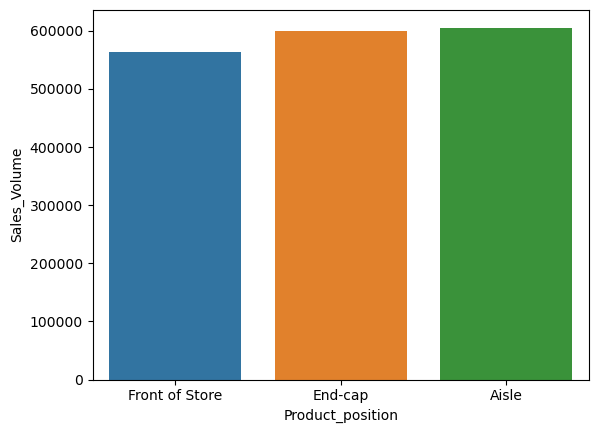

In [23]:
sns.barplot(x='Product_position', y= 'Sales_Volume', data=Sales_status)

<AxesSubplot:xlabel='Product_position', ylabel='Sales_Volume'>

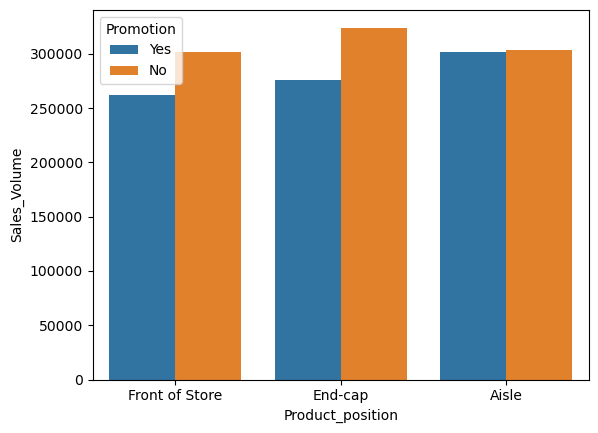

In [37]:
Position_Promotion_status= df.groupby(['Product_position','Promotion'],as_index=False)['Sales_Volume'].sum().sort_values(by='Sales_Volume', ascending= True)

sns.barplot(x= 'Product_position', y= 'Sales_Volume', data= Position_category_status, hue='Promotion' )

In [38]:
Position_Promotion_status

,Product_position,Promotion,Sales_Volume
5,Front of Store,Yes,261885
3,End-cap,Yes,275824
1,Aisle,Yes,301675
4,Front of Store,No,302039
0,Aisle,No,303795
2,End-cap,No,324093


In [40]:
Correlation_matrix = df.corr()
print(Correlation_matrix)

                    Product ID     Price  Competitor's Price  Sales_Volume
Product ID            1.000000 -0.020931           -0.021864     -0.002063
Price                -0.020931  1.000000            0.993903      0.046001
Competitor's Price   -0.021864  0.993903            1.000000      0.048552
Sales_Volume         -0.002063  0.046001            0.048552      1.000000


In [27]:
df

,Product ID,Product_position,Price,Competitor's Price,Promotion,Foot_Traffic,Consumer_Demographics,Product_Category,Seasonal,Sales_Volume
0,185102,Aisle,17.07,16.16,No,Medium,Families,Clothing,No,2823
1,188771,Aisle,17.41,13.13,No,Low,Seniors,Clothing,No,654
2,180176,End-cap,43.16,38.37,Yes,Medium,Young adults,Electronics,Yes,2220
3,112917,Aisle,42.26,38.98,Yes,Low,Families,Clothing,Yes,1568
4,192936,End-cap,47.94,45.59,No,Medium,College students,Clothing,Yes,2942
...,...,...,...,...,...,...,...,...,...,...
995,162658,End-cap,11.56,8.61,No,Medium,Families,Electronics,Yes,1133
996,146858,Front of Store,47.72,46.78,No,Medium,College students,Food,Yes,565
997,174565,Aisle,21.30,18.71,Yes,High,Seniors,Electronics,No,890
998,160629,Aisle,22.82,19.13,No,Medium,Seniors,Electronics,Yes,2538


In [44]:
Advertisement_Status =df.groupby(['Promotion'], as_index= False)['Sales_Volume'].sum().sort_values(by='Sales_Volume',ascending = True)

In [45]:
Advertisement_Status

,Promotion,Sales_Volume
1,Yes,839384
0,No,929927
